# Unusual Repeated Streak (QAQC)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob
import datetime as dt
import scipy
from IPython.display import Image

from streaks import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

## From HadISD paper:

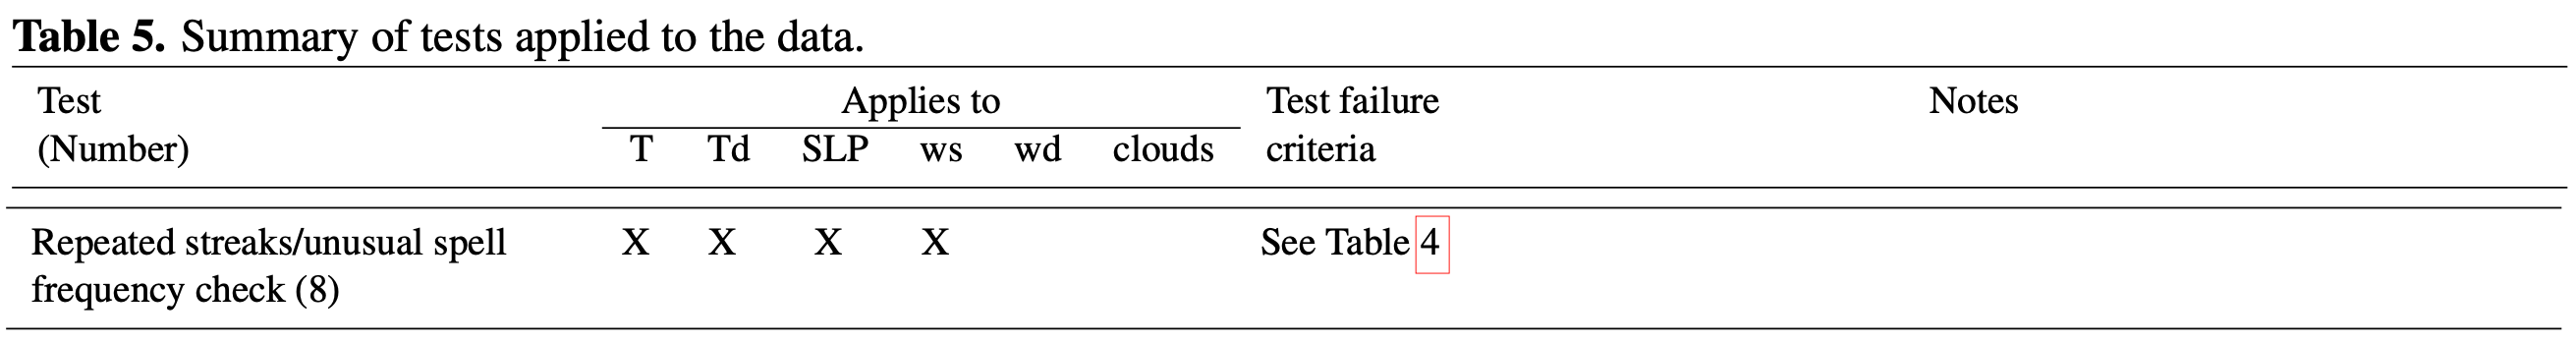

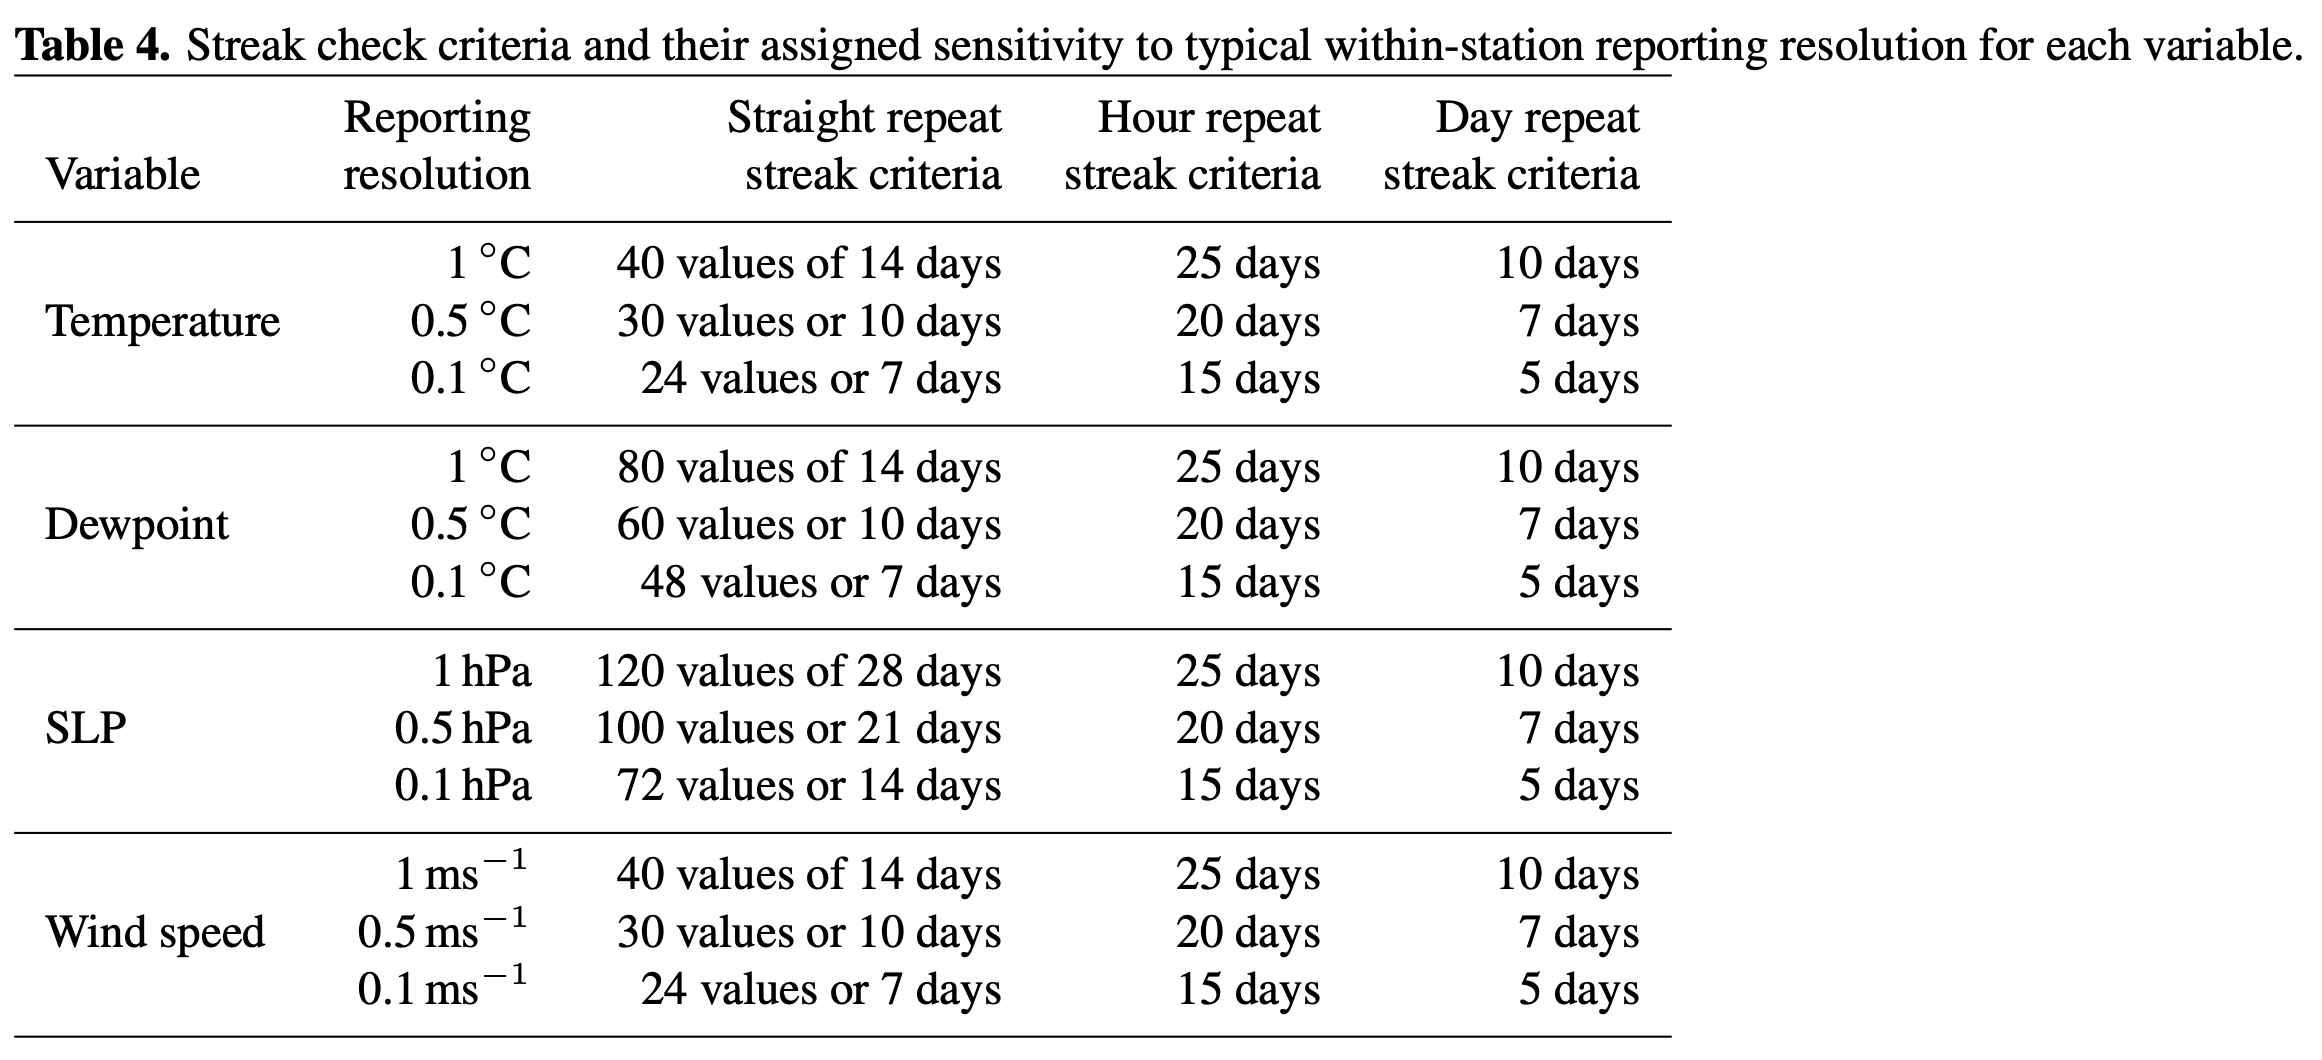

In [2]:
display(Image(filename="/Users/hector/ERA_work/Table5.png"))
display(Image(filename="/Users/hector/ERA_work/Table4.png"))

##### Test 8: repeated streaks/unusual spell frequency

<div style="display: flex;">
    <span style="width: 59%"><p size="+4.75">This test searches for consecutive observation replication, same hour observation replication over, a number of days (either using a threshold of a certain number of observations, or for sparser records, a number of days during which all the observations have the same value) and also whole day replication for a streak of days. All three tests are conditional upon the typical reporting precision as coarser precision reporting (e.g. temperatures only to the nearest whole degree) will increase the chances of a streak arising by chance (Table 4).</p></span> 
</div>


### Infere time frequency from data

In [3]:
ds = xr.open_dataset('train_files/RAWS_ZMBA2.nc')
ds = xr.open_dataset('train_files/RAWS_PKLC2.nc')
ds = xr.open_dataset('train_files/ASOSAWOS_72274793084.nc')
df = xarray_to_pandas_qaqc(ds)
infere_freq(df)

/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


{0.85393: 3600.0}

### Infere variable resolution from data

In [4]:
infere_res(df)

{'tas': 0.5, 'tdps': 0.5, 'ps': 0.5, 'sfcWind': 0.5}

### Function

In [5]:
months = pd.Series(np.array([1,1,1,2,2,2,2,2,2,8,8,8,8,8,9,9,9,9,9,9]))
months.transform(consecutive_months)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
dtype: int64

In [6]:
var = "tas"

#### Consecutive whole day repetitions

In [68]:
ds = xr.open_dataset('train_files/RAWS_ZMBA2.nc').isel(station=0)
ds = xr.open_dataset('train_files/RAWS_PKLC2.nc').isel(station=0)
ds = xr.open_dataset('train_files/ASOSAWOS_72274793084.nc')
df = xarray_to_pandas_qaqc(ds)
df = qaqc_world_record(df)

df['hours'] = pd.Series(df['time']).dt.hour.values
df['day'] = pd.Series(df['time']).dt.day.values
df['month'] = pd.Series(df['time']).dt.month.values
df['year'] = pd.Series(df['time']).dt.year.values

condition0 = np.logical_and(df['month']==6, df['year']==2011)
condition0 = np.logical_and(df['day']>=4,  condition0)
condition0 = np.logical_and(df['day']<=18, condition0)
condition0 = np.logical_and(df['hours']>=0, condition0)
condition0 = np.logical_and(df['hours']<=19, condition0)
condition0 = df[condition0].index
df = df.drop(condition0)
condition0 = np.logical_and(df['month']==6, df['year']==2011)
condition0 = np.logical_and(df['day']>=4,  condition0)
condition0 = np.logical_and(df['day']<=18, condition0)
condition0 = df[condition0].index
df.loc[condition0, 'tas'] = 280.

/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


In [69]:
threshold = day_repeat_criteria['tas'][0.5]
bad = consecutive_fullDay_repeats(df, 'tas', threshold)
print(len(bad))
ind = df['time'].isin(bad['time'])

,hours,tas,time,date
0,0,286.45,2006-01-01 00:50:00,2006-01-01
1,1,284.25,2006-01-01 01:50:00,2006-01-01
2,2,284.25,2006-01-01 02:50:00,2006-01-01
3,3,282.55,2006-01-01 03:50:00,2006-01-01
4,4,282.05,2006-01-01 04:50:00,2006-01-01
...,...,...,...,...
145219,19,304.85,2022-08-31 19:51:00,2022-08-31
145220,20,304.85,2022-08-31 20:51:00,2022-08-31
145221,21,306.45,2022-08-31 21:51:00,2022-08-31
145222,22,304.85,2022-08-31 22:51:00,2022-08-31


,group,length
0,-1981,6071
1,0,14


,group,length
1,0,14


7


,tas,date,group
date,,,
2006-01-01,"[286.4, 284.2, 284.2, 282.5, 282.0, 282.0, 282...",2006-01-01,-1981
2006-01-02,"[290.3, 288.8, 288.8, 287.0, 285.3, 281.4, 280...",2006-01-02,-1981
2006-01-03,"[293.8, 290.3, 288.8, 288.2, 286.4, 286.0, 284...",2006-01-03,-1981
2006-01-04,"[289.8, 288.8, 286.4, 285.3, 284.2, 282.0, 281...",2006-01-04,-1981
2006-01-05,"[288.8, 283.8, 282.5, 283.8, 282.5, 279.8, 279...",2006-01-05,-1981
...,...,...,...
2022-08-27,"[306.0, 304.2, 302.5, 301.4, 300.6, 301.2, 298...",2022-08-27,-1981
2022-08-28,"[306.0, 302.5, 300.3, 299.8, 298.8, 299.2, 297...",2022-08-28,-1981
2022-08-29,"[305.2, 300.4, 299.8, 298.8, 296.0, 294.8, 294...",2022-08-29,-1981


array([0])

,date,group
date,,
2011-06-05,2011-06-05,0
2011-06-06,2011-06-06,0
2011-06-07,2011-06-07,0
2011-06-08,2011-06-08,0
2011-06-09,2011-06-09,0
2011-06-10,2011-06-10,0
2011-06-11,2011-06-11,0
2011-06-12,2011-06-12,0
2011-06-13,2011-06-13,0


,hours,tas,time,date
47314,20,280.0,2011-06-05 20:51:00,2011-06-05
47315,21,280.0,2011-06-05 21:51:00,2011-06-05
47316,22,280.0,2011-06-05 22:51:00,2011-06-05
47317,23,280.0,2011-06-05 23:51:00,2011-06-05
47318,20,280.0,2011-06-06 20:51:00,2011-06-06
47319,21,280.0,2011-06-06 21:51:00,2011-06-06
47320,22,280.0,2011-06-06 22:51:00,2011-06-06
47321,23,280.0,2011-06-06 23:51:00,2011-06-06
47322,20,280.0,2011-06-07 20:51:00,2011-06-07
47323,21,280.0,2011-06-07 21:51:00,2011-06-07


56


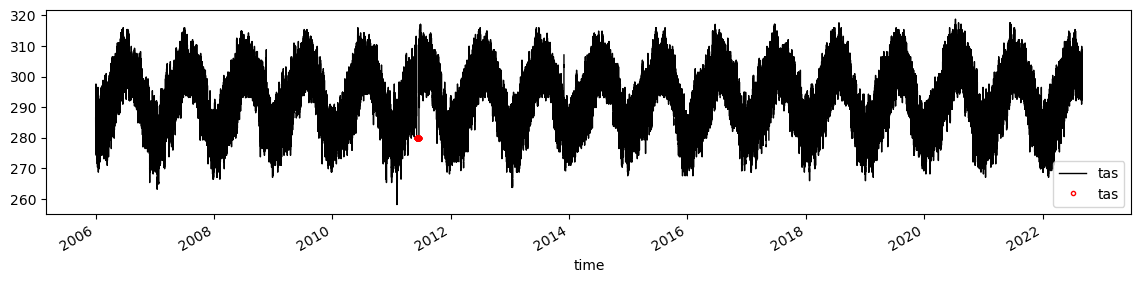

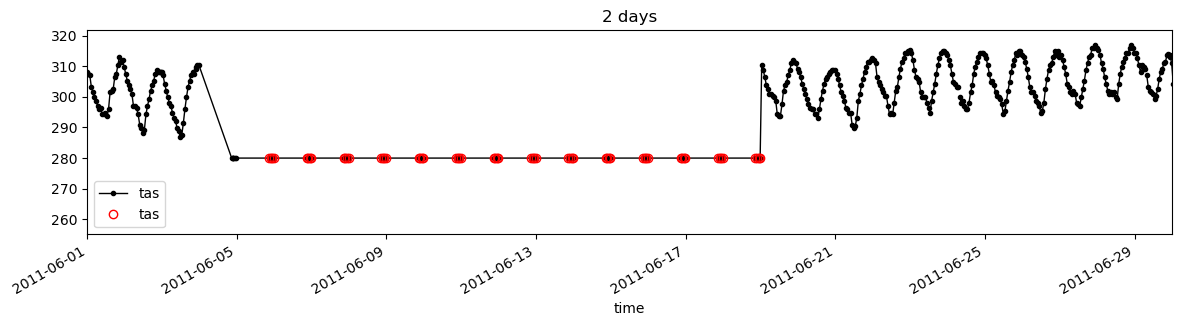

In [70]:
fig,ax = plt.subplots(figsize=(14,3))
df.plot("time", var, ax=ax, c="k", lw=1)
df.loc[ind].plot("time", "tas", ax=ax, marker='.', lw=0, mfc='none', color="red")

fig,ax = plt.subplots(figsize=(14,3))
df.plot("time", var, ax=ax, marker=".", c="k", lw=1)
df[ind].plot("time", var, ax=ax, marker='o', lw=0, mfc='none', color="red")
ax.set_xlim(np.datetime64("2011-06-01"), np.datetime64("2011-06-30"))
_ = ax.set_title("{} days".format(len(bad)//24))

#### Straight repeated values

In [88]:
ds = xr.open_dataset('train_files/RAWS_ZMBA2.nc').isel(station=0)
ds = xr.open_dataset('train_files/RAWS_PKLC2.nc').isel(station=0)
ds = xr.open_dataset('train_files/ASOSAWOS_72274793084.nc')
df = xarray_to_pandas_qaqc(ds)
df = qaqc_world_record(df)
df['tas'].iloc[11001:11035] = df['tas'].iloc[11000]
df.iloc[11001:11035]["time"].min(), df.iloc[11001:11035]["time"].max()

/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
/var/folders/dj/qqhqnt2n4993vwmy6qcpnbk80000gn/T/ipykernel_35640/4171296737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tas'].iloc[11001:11035] = df['tas'].iloc[11000]


(Timestamp('2007-02-26 19:50:00'), Timestamp('2007-02-28 03:50:00'))

In [73]:
threshold = straight_repeat_criteria['tas'][0.5]
bad = consecutive_repeats(df, 'tas', threshold)
ind = df['time'].isin(bad['time'])
ind.any()

True

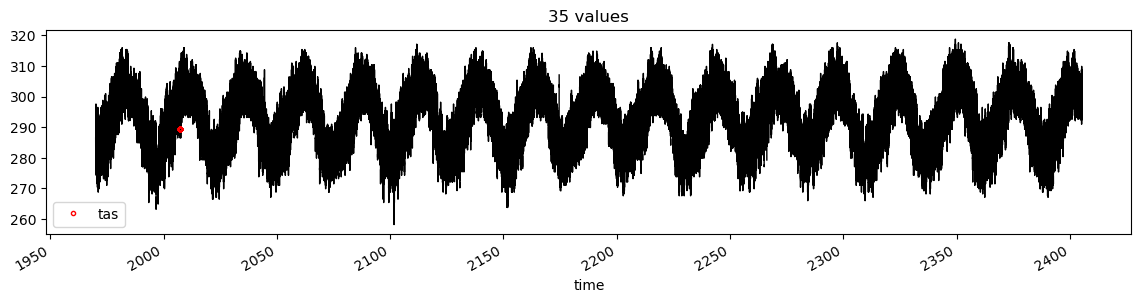

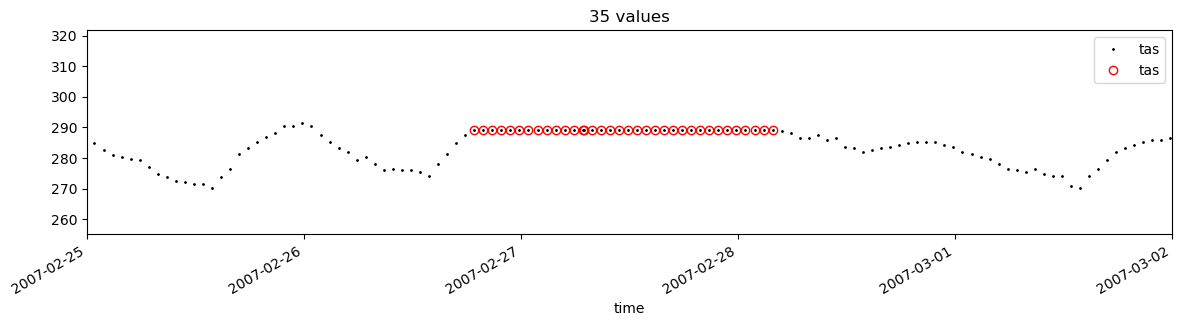

In [92]:
fig,ax = plt.subplots(figsize=(14,3))
df.tas.plot(ax=ax, c="k", lw=1)
df.loc[ind].plot("time", var, ax=ax, marker='.', lw=0, mfc='none', color="red")
_ = ax.set_title("{} values".format(len(bad)))

fig,ax = plt.subplots(figsize=(14,3))
df.plot("time", var, ax=ax, c="k", lw=0, marker=".", ms=2)
df.loc[ind].plot("time", var, ax=ax, marker='o', lw=0, mfc='none', color="red")
ax.set_xlim(np.datetime64("2007-02-25"), np.datetime64("2007-03-02"))
_ = ax.set_title("{} values".format(len(bad)))

#### Same hour repetition

In [93]:
ds = xr.open_dataset('train_files/RAWS_ZMBA2.nc').isel(station=0)
ds = xr.open_dataset('train_files/RAWS_PKLC2.nc').isel(station=0)
ds = xr.open_dataset('train_files/ASOSAWOS_72274793084.nc')
df = xarray_to_pandas_qaqc(ds)
df = qaqc_world_record(df)
df = df.copy()
df['hours'] = pd.Series(df['time']).dt.hour.values
df['day'] = pd.Series(df['time']).dt.day.values
df['month'] = pd.Series(df['time']).dt.month.values
df['year'] = pd.Series(df['time']).dt.year.values
condition = np.logical_and(df['hours']==12, np.logical_and(df['month']>2, df['month']<4))
condition = np.logical_and(df['year']==2006, condition)
condition = df[condition].index.values
df.loc[condition, 'tas'] = 300

/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


In [94]:
threshold = hour_repeat_criteria['tas'][0.5]
bad = hourly_repeats(df, 'tas', threshold)
ind = df['time'].isin(bad['time'])

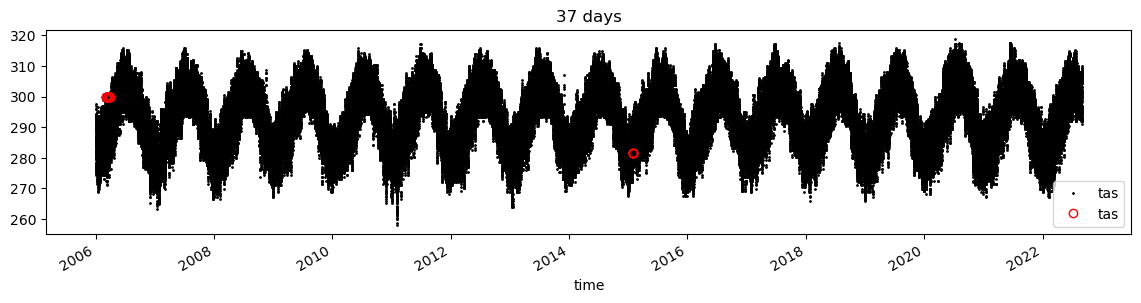

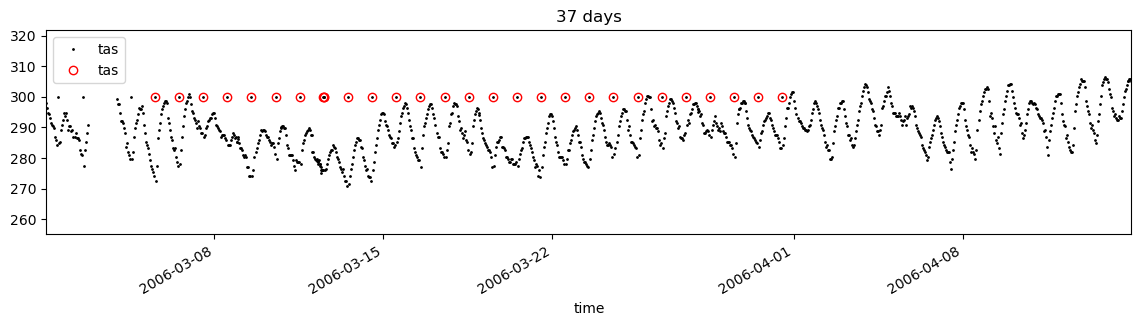

In [95]:
fig,ax = plt.subplots(figsize=(14,3))
df.plot("time", "tas", ax=ax, c="k", lw=0, marker=".", ms=2)
df.loc[ind].plot("time", "tas", ax=ax, marker='o', lw=0, mfc='none', color="red")
_ = ax.set_title("{} days".format(len(bad)))

fig,ax = plt.subplots(figsize=(14,3))
df.plot("time", "tas", ax=ax, c="k", lw=0, marker=".", ms=2)
df.loc[ind].plot("time", "tas", ax=ax, marker='o', lw=0, mfc='none', color="red")
x0 = df['time'][df['time'] >= np.datetime64("2006-03-01")].iloc[0]
x1 = df['time'][df['time'] <= np.datetime64("2006-04-15")].iloc[-1]
ax.set_xlim(x0,x1)
_ = ax.set_title("{} days".format(len(bad)))

In [85]:
ds = xr.open_dataset('train_files/RAWS_ZMBA2.nc')
ds = xr.open_dataset('train_files/RAWS_PKLC2.nc')
ds = xr.open_dataset('train_files/ASOSAWOS_72274793084.nc')
df = xarray_to_pandas_qaqc(ds)
df = qaqc_world_record(df)
df = df.copy()

df['hours'] = pd.Series(df['time']).dt.hour.values
df['day'] = pd.Series(df['time']).dt.day.values
df['month'] = pd.Series(df['time']).dt.month.values
df['year'] = pd.Series(df['time']).dt.year.values
df['date'] = pd.Series(df['time']).dt.date.values

# Whole-day
condition0 = np.logical_and(df['month']==6, df['year']==2011)
condition0 = np.logical_and(df['day']>=4,  condition0)
condition0 = np.logical_and(df['day']<=18, condition0)
condition0 = np.logical_and(df['hours']>=0, condition0)
condition0 = np.logical_and(df['hours']<=19, condition0)
condition0 = df[condition0].index
df = df.drop(condition0)
condition0 = np.logical_and(df['month']==6, df['year']==2011)
condition0 = np.logical_and(df['day']>=7,  condition0)
condition0 = np.logical_and(df['day']<=15, condition0)
condition0 = df[condition0].index
df.loc[condition0, 'tas'] = 280.

# Straight
df['tdps'].iloc[11001:11035] = df['tdps'].iloc[11000]

# Hourly 
condition = np.logical_and(df['hours']==12, np.logical_and(df['month']>2, df['month']<4))
condition = np.logical_and(df['year']==2006, condition)
condition = df[condition].index.values
df.loc[condition, 'ps'] = 90610

/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/pandas/core/arrays/timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
/Users/hector/anaconda3/envs/era_py39/lib/python3.9/site-packages/pandas/core/arrays/timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")
/var/folders/dj/qqhqnt2n4993vwmy6qcpnbk80000gn/T/ipykernel_36112/2241028465.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tdps'].iloc[11001:11035] = df['tdps'].iloc[11000]


In [86]:
newdf = qaqc_unusual_repeated_streaks(df, plot=True, local=True, verbose=True, min_sequence_length=10)

Running qaqc_unusual_repeated_streaks on ['tas', 'tdps', 'ps', 'sfcWind']
tas
hourly
straight
whole


,time,ps,tas,tdps,pr,sfcWind,sfcWind_dir,elevation,qaqc_process,ps_qc,...,pr_duration_eraqc,anemometer_height_m,thermometer_height_m,station,hours,day,month,year,date,group
51272,2011-06-08 20:51:00,90050.0,280.0,258.75,0.0,2.6,NaN,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,20,8,6,2011,2011-06-08,0
51273,2011-06-08 21:51:00,89960.0,280.0,258.75,0.0,1.5,NaN,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,21,8,6,2011,2011-06-08,0
51274,2011-06-08 22:51:00,89930.0,280.0,258.15,0.0,2.6,NaN,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,22,8,6,2011,2011-06-08,0
51275,2011-06-08 23:44:00,89900.0,280.0,256.15,NaN,7.7,260.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,23,8,6,2011,2011-06-08,0
51276,2011-06-08 23:51:00,89900.0,280.0,255.95,0.0,7.2,270.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,23,8,6,2011,2011-06-08,0
51299,2011-06-09 20:51:00,90140.0,280.0,260.95,0.0,0.0,NaN,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,20,9,6,2011,2011-06-09,0
51300,2011-06-09 21:51:00,90050.0,280.0,258.75,0.0,3.6,300.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,21,9,6,2011,2011-06-09,0
51301,2011-06-09 22:51:00,89990.0,280.0,257.05,0.0,1.5,NaN,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,22,9,6,2011,2011-06-09,0
51302,2011-06-09 23:51:00,89930.0,280.0,255.35,0.0,2.6,NaN,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,23,9,6,2011,2011-06-09,0
51324,2011-06-10 20:51:00,90140.0,280.0,254.85,0.0,2.1,NaN,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,20,10,6,2011,2011-06-10,0


tdps
hourly
straight
whole


,time,ps,tas,tdps,pr,sfcWind,sfcWind_dir,elevation,qaqc_process,ps_qc,...,pr_duration_eraqc,anemometer_height_m,thermometer_height_m,station,hours,day,month,year,date,group
0,2006-01-01 00:50:00,90300.0,286.45,266.45,0.0,3.1,330.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,0,1,1,2006,2006-01-01,0
1,2006-01-01 01:50:00,90300.0,284.25,265.95,0.0,1.5,350.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,1,1,1,2006,2006-01-01,0
2,2006-01-01 02:50:00,90300.0,284.25,265.95,0.0,2.1,170.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,2,1,1,2006,2006-01-01,0
3,2006-01-01 03:50:00,90300.0,282.55,265.95,0.0,0.0,NaN,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,3,1,1,2006,2006-01-01,0
4,2006-01-01 04:50:00,90270.0,282.05,265.95,0.0,2.1,NaN,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,4,1,1,2006,2006-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159002,2022-08-31 19:51:00,90700.0,304.85,288.75,0.0,4.6,180.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,19,31,8,2022,2022-08-31,0
159003,2022-08-31 20:51:00,90610.0,304.85,288.75,0.0,3.6,190.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,20,31,8,2022,2022-08-31,0
159004,2022-08-31 21:51:00,90510.0,306.45,288.15,0.0,5.1,150.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,21,31,8,2022,2022-08-31,0
159005,2022-08-31 22:51:00,90450.0,304.85,288.75,0.0,4.6,140.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,22,31,8,2022,2022-08-31,0


ps
hourly
straight
whole


,time,ps,tas,tdps,pr,sfcWind,sfcWind_dir,elevation,qaqc_process,ps_qc,...,pr_duration_eraqc,anemometer_height_m,thermometer_height_m,station,hours,day,month,year,date,group
0,2006-01-01 00:50:00,90300.0,286.45,266.45,0.0,3.1,330.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,0,1,1,2006,2006-01-01,0
1,2006-01-01 01:50:00,90300.0,284.25,265.95,0.0,1.5,350.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,1,1,1,2006,2006-01-01,0
2,2006-01-01 02:50:00,90300.0,284.25,265.95,0.0,2.1,170.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,2,1,1,2006,2006-01-01,0
3,2006-01-01 03:50:00,90300.0,282.55,265.95,0.0,0.0,NaN,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,3,1,1,2006,2006-01-01,0
4,2006-01-01 04:50:00,90270.0,282.05,265.95,0.0,2.1,NaN,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,4,1,1,2006,2006-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159002,2022-08-31 19:51:00,90700.0,304.85,288.75,0.0,4.6,180.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,19,31,8,2022,2022-08-31,0
159003,2022-08-31 20:51:00,90610.0,304.85,288.75,0.0,3.6,190.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,20,31,8,2022,2022-08-31,0
159004,2022-08-31 21:51:00,90510.0,306.45,288.15,0.0,5.1,150.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,21,31,8,2022,2022-08-31,0
159005,2022-08-31 22:51:00,90450.0,304.85,288.75,0.0,4.6,140.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,22,31,8,2022,2022-08-31,0


sfcWind
hourly
straight
whole


,time,ps,tas,tdps,pr,sfcWind,sfcWind_dir,elevation,qaqc_process,ps_qc,...,pr_duration_eraqc,anemometer_height_m,thermometer_height_m,station,hours,day,month,year,date,group
0,2006-01-01 00:50:00,90300.0,286.45,266.45,0.0,3.1,330.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,0,1,1,2006,2006-01-01,0
1,2006-01-01 01:50:00,90300.0,284.25,265.95,0.0,1.5,350.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,1,1,1,2006,2006-01-01,0
2,2006-01-01 02:50:00,90300.0,284.25,265.95,0.0,2.1,170.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,2,1,1,2006,2006-01-01,0
3,2006-01-01 03:50:00,90300.0,282.55,265.95,0.0,0.0,NaN,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,3,1,1,2006,2006-01-01,0
4,2006-01-01 04:50:00,90270.0,282.05,265.95,0.0,2.1,NaN,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,4,1,1,2006,2006-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159002,2022-08-31 19:51:00,90700.0,304.85,288.75,0.0,4.6,180.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,19,31,8,2022,2022-08-31,0
159003,2022-08-31 20:51:00,90610.0,304.85,288.75,0.0,3.6,190.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,20,31,8,2022,2022-08-31,0
159004,2022-08-31 21:51:00,90510.0,306.45,288.15,0.0,5.1,150.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,21,31,8,2022,2022-08-31,0
159005,2022-08-31 22:51:00,90450.0,304.85,288.75,0.0,4.6,140.0,963.0,V020,5,...,NaT,10.06,NaN,ASOSAWOS_72274793084,22,31,8,2022,2022-08-31,0


In [ ]:
(
  newdf['tas_eraqc'].dropna().any(),
  newdf['tdps_eraqc'].dropna().any(),
  newdf['sfcWind_eraqc'].dropna().any(),
  newdf['ps_eraqc'].dropna().any(),
)

In [60]:
## Import Libraries
import boto3
from io import BytesIO, StringIO

In [334]:
var = "tas"
unusual_streaks_plot(newdf, var, flagvals=(27,28,29), dpi=None, local=True, date=None)

In [335]:
var = "sfcWind"
unusual_streaks_plot(newdf, var, flagvals=(27,28,29), dpi=None, local=True, date=None)

In [336]:
ind = newdf['sfcWind_eraqc']==27
newdf[ind][['time','sfcWind']]

,time,sfcWind
94655,2015-12-23 15:07:00,0.0
94656,2015-12-23 15:51:00,0.0
94702,2015-12-24 15:10:00,0.0
94703,2015-12-24 15:13:00,0.0
94704,2015-12-24 15:20:00,0.0
94705,2015-12-24 15:32:00,0.0
94706,2015-12-24 15:51:00,0.0
94737,2015-12-25 15:43:00,0.0
94738,2015-12-25 15:49:00,0.0


In [478]:
len(df)

159007

In [479]:
df2 = df[~df.index.duplicated()].sort_index()

In [484]:
len(df)

158805